In [2]:
import pandas as pd
import numpy as np
import json
import re

In [3]:
import matplotlib.pyplot as plt
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']

In [4]:
%matplotlib notebook

In [5]:
path = './Download/拉钩网职位数据.json'

In [6]:
df = pd.read_json(path, encoding='utf-8')

In [7]:
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,district,education,financeStage,industryField,industryLables,positionAdvantage,positionId,positionLables,positionName,salary,skillLables,workYear
0,杭州,杭州魔蝎数据科技有限公司,139350,"[股票期权, 带薪年假, 岗位晋升, 阿里大牛]",魔蝎科技,50-150人,西湖区,本科,B轮,"数据服务,移动互联网","[大数据, 金融, 数据挖掘, 数据分析]","年底多薪,股票期权,节日福利,多样团建",4367927,"[大数据, 金融, 数据挖掘, 数据分析]",风控建模工程师,15k-30k,"[数据挖掘, 数据分析]",1-3年
1,深圳,顺丰科技有限公司,35996,"[技能培训, 节日礼物, 带薪年假, 岗位晋升]",顺丰科技有限公司,2000人以上,南山区,硕士,不需要融资,物流丨运输,[],弹性工作时间 发展空间大 午餐补贴,6130786,[Hive],DSJ-大数据挖掘与分析工程师,25k-50k,[Hive],3-5年
2,北京,北京音娱时光科技有限公司,286568,"[年底双薪, 绩效奖金, 带薪年假, 免费健身]",音娱时光,50-150人,海淀区,本科,A轮,移动互联网,[],技术大牛多；免费餐饮；氛围好；,6263661,"[SQL, BI, SPSS]",数据分析,10k-18k,"[SQL, BI, SPSS]",1-3年
3,北京,北京拉勾网络技术有限公司,147,"[五险一金, 弹性工作, 带薪年假, 免费两餐]",拉勾网,500-2000人,海淀区,本科,D轮及以上,企业服务,[],业务数据；可视化；分析,6201593,"[SQL, 数据分析, BI, SPSS]",数据分析师,10k-18k,"[SQL, 数据分析, BI, SPSS]",1-3年
4,北京,上海微创软件股份有限公司,124652,"[绩效奖金, 年底双薪, 带薪年假, 定期体检]",微创软件,2000人以上,海淀区,大专,不需要融资,"企业服务,移动互联网","[移动互联网, 可视化, SQL, 数据分析]",五险一金,6257851,"[移动互联网, 可视化, SQL, 数据分析]",数据分析（赴腾讯）,7k-8k,"[可视化, SQL, 数据分析]",1-3年


In [8]:
df.columns.str.replace('Lable', 'Label')

Index(['city', 'companyFullName', 'companyId', 'companyLabelList',
       'companyShortName', 'companySize', 'district', 'education',
       'financeStage', 'industryField', 'industryLabels', 'positionAdvantage',
       'positionId', 'positionLabels', 'positionName', 'salary', 'skillLabels',
       'workYear'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace('Lable', 'Label')

In [10]:
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,district,education,financeStage,industryField,industryLabels,positionAdvantage,positionId,positionLabels,positionName,salary,skillLabels,workYear
0,杭州,杭州魔蝎数据科技有限公司,139350,"[股票期权, 带薪年假, 岗位晋升, 阿里大牛]",魔蝎科技,50-150人,西湖区,本科,B轮,"数据服务,移动互联网","[大数据, 金融, 数据挖掘, 数据分析]","年底多薪,股票期权,节日福利,多样团建",4367927,"[大数据, 金融, 数据挖掘, 数据分析]",风控建模工程师,15k-30k,"[数据挖掘, 数据分析]",1-3年
1,深圳,顺丰科技有限公司,35996,"[技能培训, 节日礼物, 带薪年假, 岗位晋升]",顺丰科技有限公司,2000人以上,南山区,硕士,不需要融资,物流丨运输,[],弹性工作时间 发展空间大 午餐补贴,6130786,[Hive],DSJ-大数据挖掘与分析工程师,25k-50k,[Hive],3-5年
2,北京,北京音娱时光科技有限公司,286568,"[年底双薪, 绩效奖金, 带薪年假, 免费健身]",音娱时光,50-150人,海淀区,本科,A轮,移动互联网,[],技术大牛多；免费餐饮；氛围好；,6263661,"[SQL, BI, SPSS]",数据分析,10k-18k,"[SQL, BI, SPSS]",1-3年
3,北京,北京拉勾网络技术有限公司,147,"[五险一金, 弹性工作, 带薪年假, 免费两餐]",拉勾网,500-2000人,海淀区,本科,D轮及以上,企业服务,[],业务数据；可视化；分析,6201593,"[SQL, 数据分析, BI, SPSS]",数据分析师,10k-18k,"[SQL, 数据分析, BI, SPSS]",1-3年
4,北京,上海微创软件股份有限公司,124652,"[绩效奖金, 年底双薪, 带薪年假, 定期体检]",微创软件,2000人以上,海淀区,大专,不需要融资,"企业服务,移动互联网","[移动互联网, 可视化, SQL, 数据分析]",五险一金,6257851,"[移动互联网, 可视化, SQL, 数据分析]",数据分析（赴腾讯）,7k-8k,"[可视化, SQL, 数据分析]",1-3年


In [11]:
df.columns.str.contains('Label')

array([False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False])

In [12]:
df[df.columns[df.columns.str.contains('Label')]] = df[df.columns[df.columns.str.contains('Label')]].applymap(lambda x: ','.join(x))

In [13]:
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,district,education,financeStage,industryField,industryLabels,positionAdvantage,positionId,positionLabels,positionName,salary,skillLabels,workYear
0,杭州,杭州魔蝎数据科技有限公司,139350,"股票期权,带薪年假,岗位晋升,阿里大牛",魔蝎科技,50-150人,西湖区,本科,B轮,"数据服务,移动互联网","大数据,金融,数据挖掘,数据分析","年底多薪,股票期权,节日福利,多样团建",4367927,"大数据,金融,数据挖掘,数据分析",风控建模工程师,15k-30k,"数据挖掘,数据分析",1-3年
1,深圳,顺丰科技有限公司,35996,"技能培训,节日礼物,带薪年假,岗位晋升",顺丰科技有限公司,2000人以上,南山区,硕士,不需要融资,物流丨运输,,弹性工作时间 发展空间大 午餐补贴,6130786,Hive,DSJ-大数据挖掘与分析工程师,25k-50k,Hive,3-5年
2,北京,北京音娱时光科技有限公司,286568,"年底双薪,绩效奖金,带薪年假,免费健身",音娱时光,50-150人,海淀区,本科,A轮,移动互联网,,技术大牛多；免费餐饮；氛围好；,6263661,"SQL,BI,SPSS",数据分析,10k-18k,"SQL,BI,SPSS",1-3年
3,北京,北京拉勾网络技术有限公司,147,"五险一金,弹性工作,带薪年假,免费两餐",拉勾网,500-2000人,海淀区,本科,D轮及以上,企业服务,,业务数据；可视化；分析,6201593,"SQL,数据分析,BI,SPSS",数据分析师,10k-18k,"SQL,数据分析,BI,SPSS",1-3年
4,北京,上海微创软件股份有限公司,124652,"绩效奖金,年底双薪,带薪年假,定期体检",微创软件,2000人以上,海淀区,大专,不需要融资,"企业服务,移动互联网","移动互联网,可视化,SQL,数据分析",五险一金,6257851,"移动互联网,可视化,SQL,数据分析",数据分析（赴腾讯）,7k-8k,"可视化,SQL,数据分析",1-3年


# 城市分布

In [84]:
city_count = df.city.value_counts()
city_count.index

Index(['北京', '上海', '深圳', '广州', '杭州', '成都', '武汉', '南京', '苏州', '厦门', '长沙', '郑州',
       '济南', '福州', '西安', '天津', '东莞', '佛山', '珠海', '合肥'],
      dtype='object')

In [81]:
# 把北上广深杭之外的城市标记为其他
city_count_transformed = df.city.map(lambda x: x if x in ['北京','上海','广州','深圳','杭州'] else '其它').value_counts()
city_count_transformed.reset_index().rename(columns={'index':'City','city':'Number'})

,City,Number
0,北京,161
1,上海,106
2,深圳,71
3,其它,46
4,广州,35
5,杭州,31


<IPython.core.display.Javascript object>


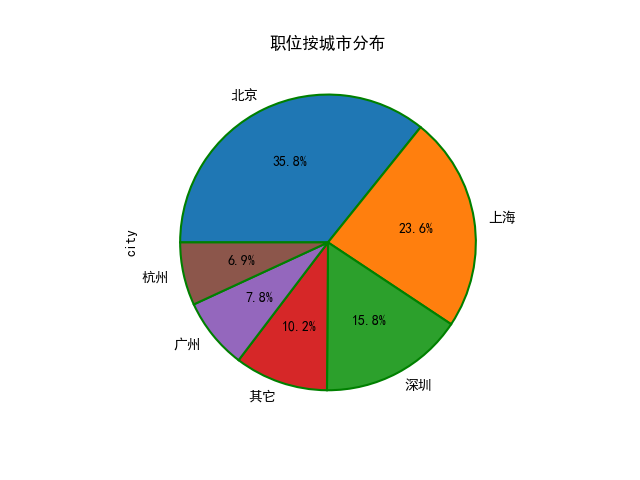

In [91]:
plt.figure()
plt.axes(aspect = 'equal')
city_count_transformed.plot(kind = 'pie',autopct='%.1f%%',radius = 1,startangle = 180,counterclock = False,title = '职位按城市分布', wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'}, textprops = {'fontsize':10, 'color':'black'})

# 行业分布

In [87]:
industries = df.industryField.str.split(',', expand=True)
industry_count = pd.concat([industries[0],industries[1]],ignore_index=True).value_counts()

In [88]:
industry_count_pct = industry_count / industry_count.sum()
industry_count_pct.plot.bar()

<IPython.core.display.Javascript object>


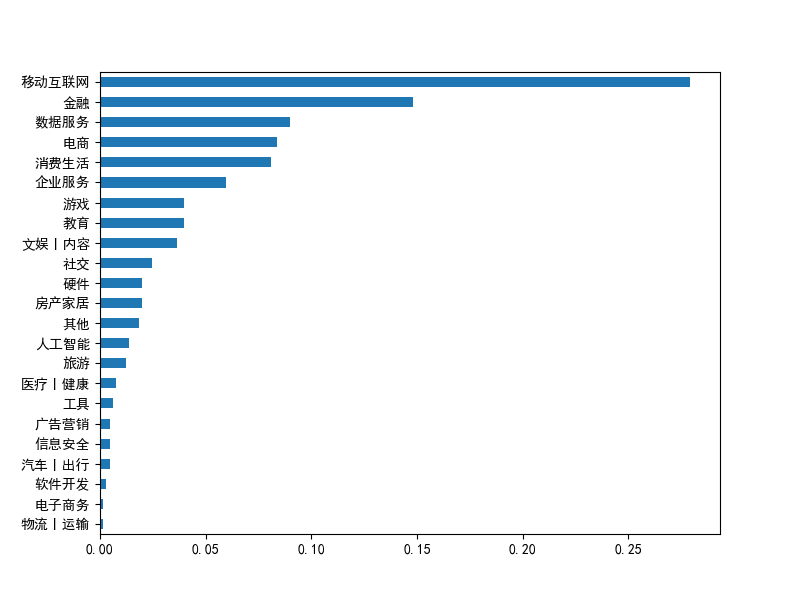

In [89]:
fig = plt.figure(figsize=(8,6))
industry_count_pct.sort_values().plot.barh()

<IPython.core.display.Javascript object>


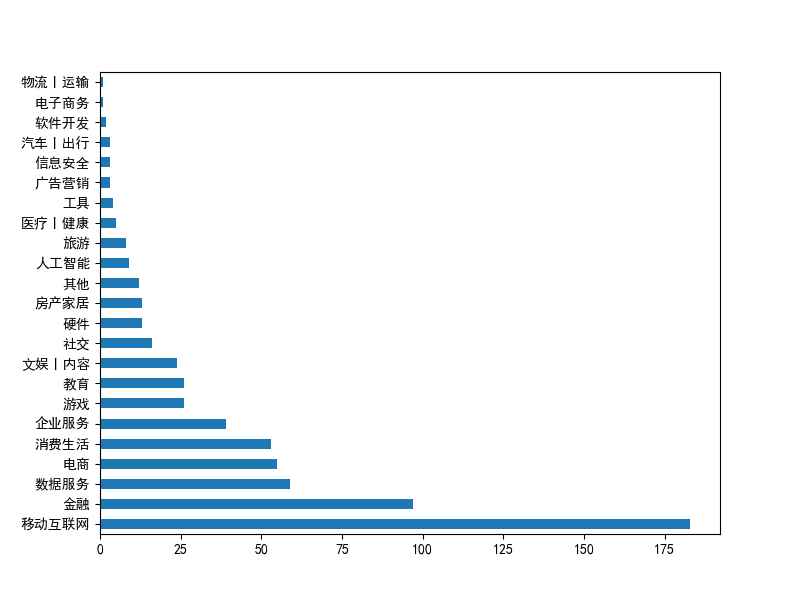

In [90]:
fig = plt.figure(figsize=(8,6))
industry_count.plot.barh()

# 融资情况

In [97]:
subset_finance = df[['companyId','financeStage']]

In [101]:
subset_finance = subset_finance.drop_duplicates()

In [102]:
subset_finance.financeStage.value_counts()

不需要融资    81
上市公司     64
B轮       44
D轮及以上    38
A轮       34
未融资      33
C轮       31
天使轮       5
Name: financeStage, dtype: int64

In [113]:

subset_financeStage = np.where(subset_finance.financeStage.str.contains('轮'), '已融资', subset_finance.financeStage)
pd.value_counts(subset_financeStage).reset_index().rename(columns={'index':'financeStage',0:'number'})

,financeStage,number
0,已融资,152
1,不需要融资,81
2,上市公司,64
3,未融资,33


<IPython.core.display.Javascript object>


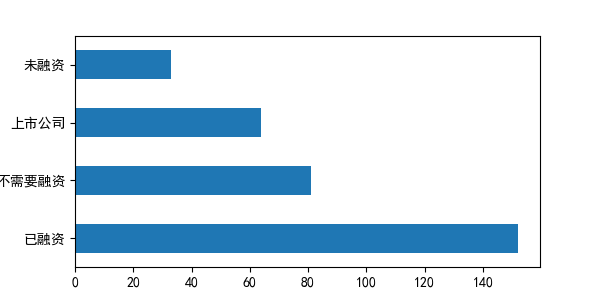

In [130]:
fig = plt.figure(figsize=(6,3))
pd.value_counts(subset_financeStage).plot.barh()

# 公司规模

In [122]:
subset_companySize = df[['companyId','companySize']].drop_duplicates()

<IPython.core.display.Javascript object>


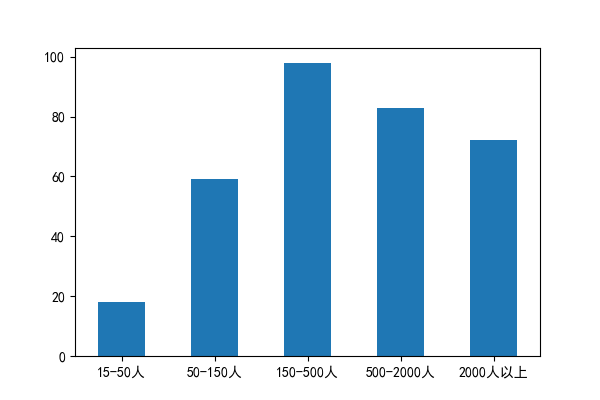

In [138]:
plt.figure(figsize=(6,4))
pd.value_counts(subset_companySize.companySize).iloc[[4,3,0,1,2]].plot.bar(rot=0)

In [143]:
subset_companySize_financeStage = pd.merge(subset_companySize, subset_finance).drop_duplicates()

In [145]:
subset_companySize_financeStage.financeStage = np.where(subset_companySize_financeStage.financeStage.str.contains('轮'), '已融资', subset_companySize_financeStage.financeStage)
subset_companySize_financeStage

,companyId,companySize,financeStage
0,139350,50-150人,已融资
1,35996,2000人以上,不需要融资
2,286568,50-150人,已融资
3,147,500-2000人,已融资
4,124652,2000人以上,不需要融资
5,418198,15-50人,不需要融资
6,177115,150-500人,未融资
7,53634,50-150人,不需要融资
8,14033,2000人以上,不需要融资
9,110641,50-150人,已融资


<IPython.core.display.Javascript object>


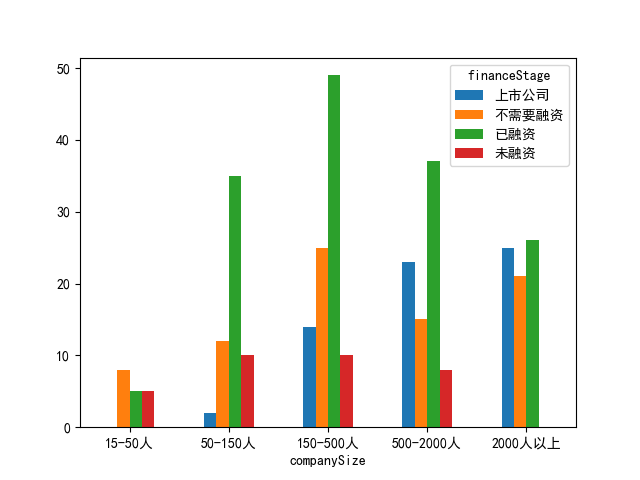

In [150]:
subset_companySize_financeStage.groupby(['companySize','financeStage']).size().unstack().iloc[[0,3,1,4,2],:].fillna(0).plot.bar(rot=0)

# 薪资水平

In [32]:
salary = df.salary.str.split('-', expand=True)

In [33]:
low = salary[0]
high = salary[1]

In [34]:
df.salary.value_counts()[:10].sort_index()

10k-15k    28
10k-18k     8
10k-20k    36
15k-20k    23
15k-25k    72
15k-30k    58
20k-30k    11
20k-40k    28
6k-10k      8
8k-15k     17
Name: salary, dtype: int64

In [35]:
df['mean_salary'] = df.salary.str.extract(r'(\d+)k-(\d+)k').astype('float').mean(axis=1)

In [36]:
salary_count = df.mean_salary.value_counts().sort_index()

In [37]:
def get_salary_interval(x):
    if x <= 5:
        interval = '1-5k'
    elif x <= 10:
        interval = '5-10k'
    elif x <= 15:
        interval = '10-15k'
    elif x <= 20:
        interval = '15-20k'
    elif x <= 25:
        interval = '20-25k'
    elif x <= 30:
        interval = '25-30k'
    else:
        interval = '30k以上'
    return interval

<IPython.core.display.Javascript object>


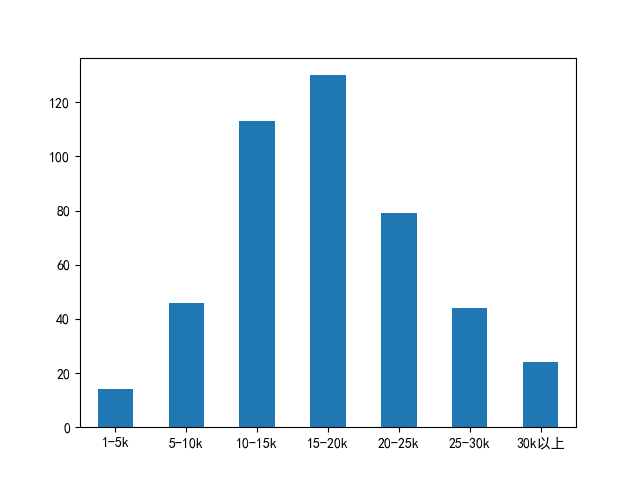

In [151]:
fig = plt.figure()
df.mean_salary.map(get_salary_interval).value_counts().sort_index().iloc[[0,6,1,2,3,4,5]].plot.bar(rot=0)

In [39]:
df['salary_interval'] = df.mean_salary.map(get_salary_interval)

In [40]:
df.salary_interval.value_counts()

15-20k    130
10-15k    113
20-25k     79
5-10k      46
25-30k     44
30k以上      24
1-5k       14
Name: salary_interval, dtype: int64

# 技能要求

In [41]:
skills = df.skillLabels.str.split(',',expand=True)

In [42]:
l = []
for column in skills.columns:
    l.append(skills[column])

In [43]:
pd.concat(l,ignore_index=True).value_counts()

数据分析         362
SQL          118
数据运营          75
BI            66
数据库           51
              44
商业            44
可视化           35
SPSS          34
数据挖掘          32
MySQL         24
数据处理          12
数据仓库           8
增长黑客           8
Hive           8
ETL            7
SQLServer      7
算法             7
Hadoop         6
风险分析           5
数据架构           4
风控             4
行业分析           3
机器学习           2
用户增长           2
数据库开发          2
风险管理           2
DBA            2
信贷风险管理         2
Spark          2
市场分析           2
资信评估           2
Redis          1
内容             1
产品策划           1
信用管理           1
营销策略           1
分析师            1
商家运营           1
风险评估           1
策略运营           1
建模             1
Oracle         1
项目管理           1
运营             1
市场竞争分析         1
Java           1
dtype: int64

# 工作经验

<IPython.core.display.Javascript object>


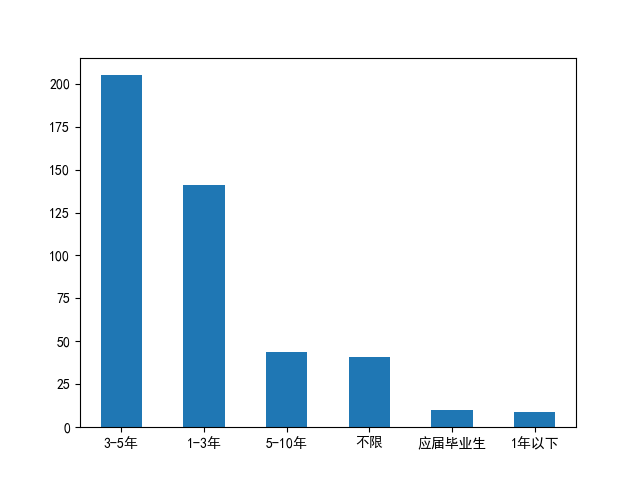

In [153]:
plt.figure()
df.workYear.value_counts().plot.bar(rot=0)

In [46]:
grouped_by_year_salary = df.groupby(['workYear','salary_interval']).size().unstack(level=0).fillna(0)

<IPython.core.display.Javascript object>


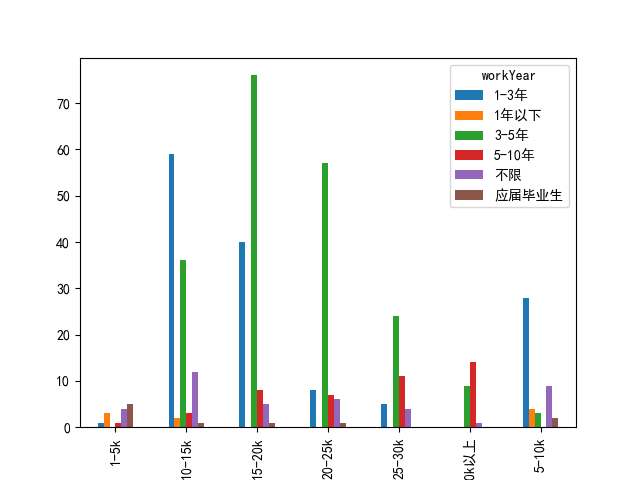

In [47]:
grouped_by_year_salary.plot.bar()

In [49]:
subsets = df[df.workYear.str.contains('年')][['salary_interval','workYear']]

In [50]:
group_by_work_salary = subsets.groupby(['workYear','salary_interval']).size().unstack(level=0).fillna(0).iloc[[0,6,1,2,3,4,5], [1,0,2,3]]

<IPython.core.display.Javascript object>


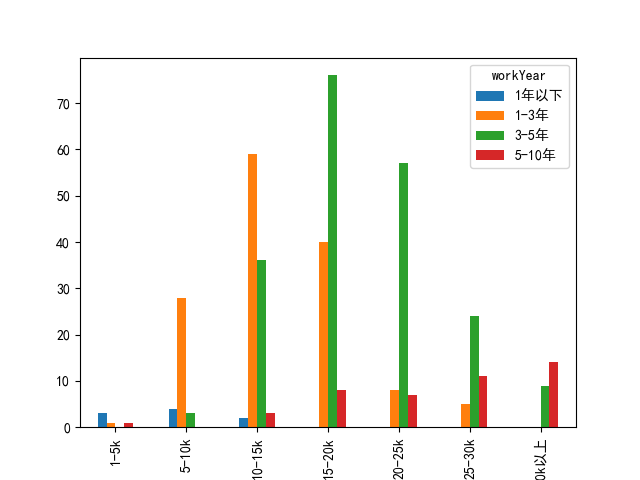

In [51]:
group_by_work_salary.plot.bar()

<IPython.core.display.Javascript object>


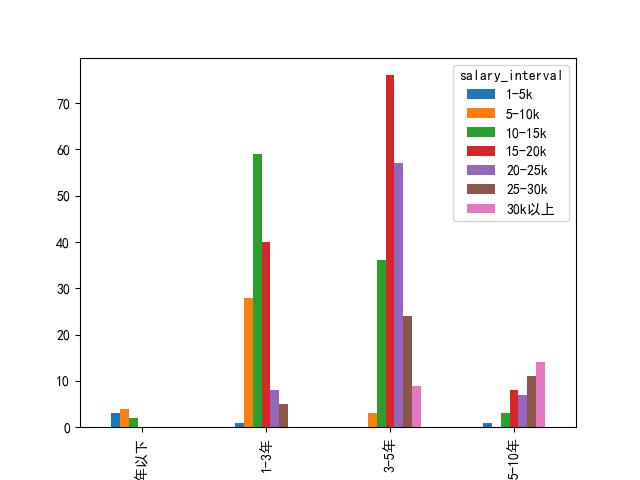

In [53]:
subsets.groupby(['workYear','salary_interval']).size().unstack().fillna(0).iloc[[1,0,2,3],[0,6,1,2,3,4,5]].plot.bar()

In [56]:
table = subsets.groupby(['workYear','salary_interval']).size().unstack().fillna(0).iloc[[1,0,2,3],[0,6,1,2,3,4,5]]
table

salary_interval,1-5k,5-10k,10-15k,15-20k,20-25k,25-30k,30k以上
workYear,,,,,,,
1年以下,3.0,4.0,2.0,0.0,0.0,0.0,0.0
1-3年,1.0,28.0,59.0,40.0,8.0,5.0,0.0
3-5年,0.0,3.0,36.0,76.0,57.0,24.0,9.0
5-10年,1.0,0.0,3.0,8.0,7.0,11.0,14.0


In [57]:
table_pct = table.div(table.sum(1), axis=0)
table_pct

salary_interval,1-5k,5-10k,10-15k,15-20k,20-25k,25-30k,30k以上
workYear,,,,,,,
1年以下,0.333333,0.444444,0.222222,0.000000,0.000000,0.000000,0.000000
1-3年,0.007092,0.198582,0.418440,0.283688,0.056738,0.035461,0.000000
3-5年,0.000000,0.014634,0.175610,0.370732,0.278049,0.117073,0.043902
5-10年,0.022727,0.000000,0.068182,0.181818,0.159091,0.250000,0.318182


<IPython.core.display.Javascript object>


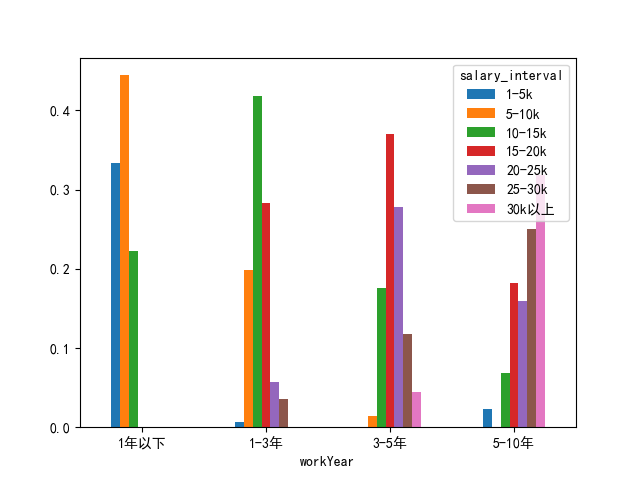

In [152]:
table_pct.plot.bar(rot=0)

# 学历

In [61]:
df.education.value_counts()

本科    380
不限     27
硕士     22
大专     21
Name: education, dtype: int64

In [67]:
group_by_salary_education = df.groupby(['salary_interval','education']).size().unstack().fillna(0)
group_by_salary_education

education,不限,大专,本科,硕士
salary_interval,,,,
1-5k,1.0,2.0,11.0,0.0
10-15k,6.0,2.0,97.0,8.0
15-20k,7.0,2.0,119.0,2.0
20-25k,6.0,5.0,62.0,6.0
25-30k,1.0,0.0,42.0,1.0
30k以上,1.0,0.0,19.0,4.0
5-10k,5.0,10.0,30.0,1.0


<IPython.core.display.Javascript object>


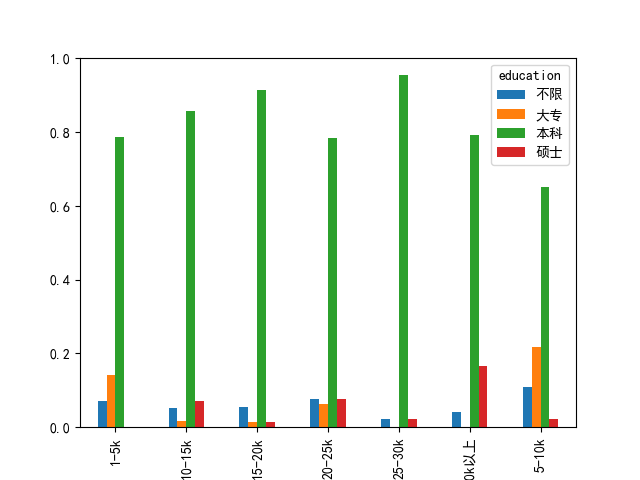

In [70]:
group_by_salary_education.div(group_by_salary_education.sum(1),axis=0).plot.bar()

In [154]:
g = df.groupby(['salary_interval','education']).size().unstack(level=0).fillna(0).iloc[:,[0,6,1,2,3,4,5]]

<IPython.core.display.Javascript object>


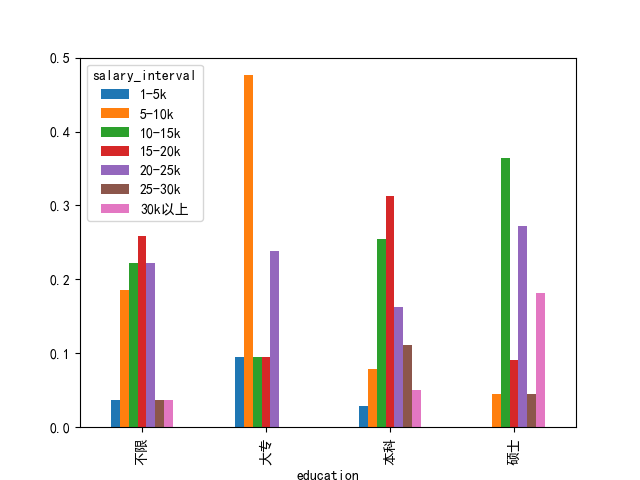

In [155]:
g.div(g.sum(1), axis=0).plot.bar()

In [165]:
table_workyear_education = df.pivot_table(index='workYear', columns='education', values='mean_salary', aggfunc='mean', fill_value=0).iloc[[1,0,2,3],:]

<IPython.core.display.Javascript object>


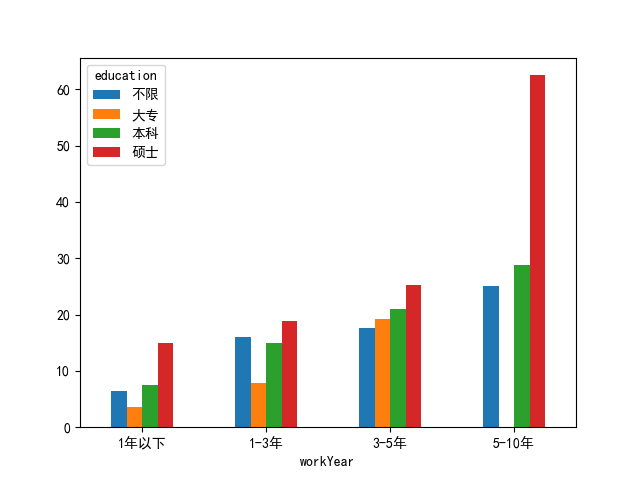

In [168]:
table_workyear_education.plot.bar(rot=0)

In [176]:
df[['salary_interval','mean_salary','education','workYear']][df.workYear.str.contains('10')]

,salary_interval,mean_salary,education,workYear
5,20-25k,21.5,本科,5-10年
10,15-20k,20.0,本科,5-10年
31,30k以上,45.0,本科,5-10年
45,25-30k,30.0,本科,5-10年
48,20-25k,25.0,本科,5-10年
49,15-20k,20.0,本科,5-10年
50,20-25k,25.0,本科,5-10年
51,30k以上,32.5,本科,5-10年
52,30k以上,65.0,本科,5-10年
57,25-30k,30.0,本科,5-10年


In [172]:
df.iloc[88,:]

city                             深圳
companyFullName      深圳市万顺赢投资咨询有限公司
companyId                    272113
companyLabelList                   
companyShortName                万顺赢
companySize                150-500人
district                        南山区
education                        硕士
financeStage                    未融资
industryField              移动互联网,金融
industryLabels            医疗健康,工具软件
positionAdvantage        中国知名企业，福利好
positionId                  6268246
positionLabels            医疗健康,工具软件
positionName                 数据分析总监
salary                      45k-80k
skillLabels                        
workYear                      5-10年
mean_salary                    62.5
salary_interval               30k以上
Name: 88, dtype: object